In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


Variable Descriptions
- country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
- year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
- status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
- life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
- adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%

- infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants

- alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
- percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
- hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
- measles (Ratio) - number of reported Measles cases per 1000 population
- bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
- under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
- polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
- total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
- diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
- hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to IV/AIDS per 1000 births
- gdp (Ratio) - Gross Domestic Product per capita
- population (Ratio) - population of a country
- thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
- thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
- income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- schooling (Ratio) - average number of years of schooling of a population

In [60]:
df.rename(columns={' thinness  1-19 years':'thinness 10-19 years'}, inplace=True) # 컬럼명 수정

In [61]:
original_cols = list(df.columns)
new_cols = []

# 컬럼 공백 제거 및 소문자 변형
for col in original_cols:
    new_cols.append(col.strip().replace('  ', ' ').lower())
df.columns = new_cols
                    

In [62]:
# Showing The Length of The Data
print("The Length of The Data: ", len(df))

The Length of The Data:  2938


In [63]:
# Showing The Shape of The Data
print("The Shape of The Data: ", df.shape)

The Shape of The Data:  (2938, 22)


In [64]:
# Showing The Information of The Data
print("The Information of The Data: ")
df.info()

The Information of The Data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life expectancy                  2928 non-null   float64
 4   adult mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   hepatitis b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int

In [65]:
# Showing The Statistical Calculations
print("The Statistical Calculations: ")
df.describe()

The Statistical Calculations: 


,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 10-19 years,thinness 5-9 years,income composition of resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [66]:
df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 10-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

In [67]:
# Check for duplicate rows
print(f"There are {df.duplicated().sum()} duplicated rows in the data set.")

There are 0 duplicated rows in the data set.


### Missing Values Detection 결측치 감지

In [68]:
# Checking for Null Values
df.isnull().sum()

country                              0
year                                 0
status                               0
life expectancy                     10
adult mortality                     10
infant deaths                        0
alcohol                            194
percentage expenditure               0
hepatitis b                        553
measles                              0
bmi                                 34
under-five deaths                    0
polio                               19
total expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
income composition of resources    167
schooling                          163
dtype: int64

In [69]:
df.describe().iloc[:, 1:]

,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 10-19 years,thinness 5-9 years,income composition of resources,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


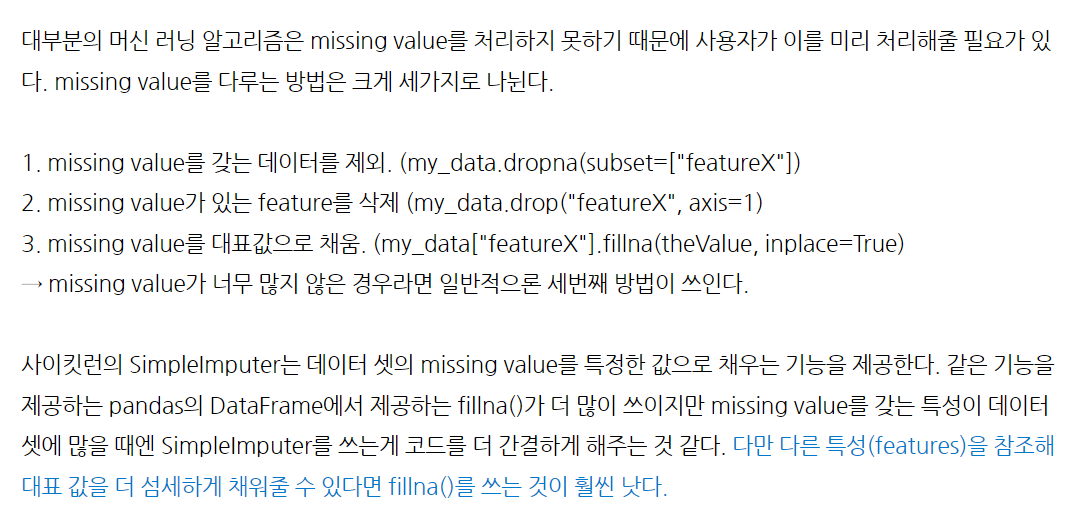

결측치를 갖는 데이터 혹은 컬럼을 제외하는 것보다는, 대표값으로 채워야할 것 같다는 생각을 함
=> SimpleImputer 라이브러리
   > https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
1) mean 평균으로 대체
2) median 중앙값
3) constant
4) most_frequent

### 평균으로 결측치를 채워보자

In [70]:
from sklearn.impute import SimpleImputer
import numpy as np

# Create a SimpleImputer instance
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', fill_value = None)

In [71]:
# Find columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()

# Display the list of columns with missing values
columns_with_missing_values

['life expectancy',
 'adult mortality',
 'alcohol',
 'hepatitis b',
 'bmi',
 'polio',
 'total expenditure',
 'diphtheria',
 'gdp',
 'population',
 'thinness 10-19 years',
 'thinness 5-9 years',
 'income composition of resources',
 'schooling']

In [72]:
# Impute each column in the DataFrame
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

In [73]:
df.isna().sum()

country                            0
year                               0
status                             0
life expectancy                    0
adult mortality                    0
infant deaths                      0
alcohol                            0
percentage expenditure             0
hepatitis b                        0
measles                            0
bmi                                0
under-five deaths                  0
polio                              0
total expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness 10-19 years               0
thinness 5-9 years                 0
income composition of resources    0
schooling                          0
dtype: int64

In [74]:
df.describe()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 10-19 years,thinness 5-9 years,income composition of resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


- 결측치 처리 완

### 우선, object형 컬럼을 제외한 수치형 컬럼 간의 상관계수 확인_df1

In [75]:
df1 = df.drop(columns={'country', 'status'})
df1

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 10-19 years,thinness 5-9 years,income composition of resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [76]:
df1.corr()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 10-19 years,thinness 5-9 years,income composition of resources,schooling
year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
adult mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
hepatitis b,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
bmi,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


<Axes: >

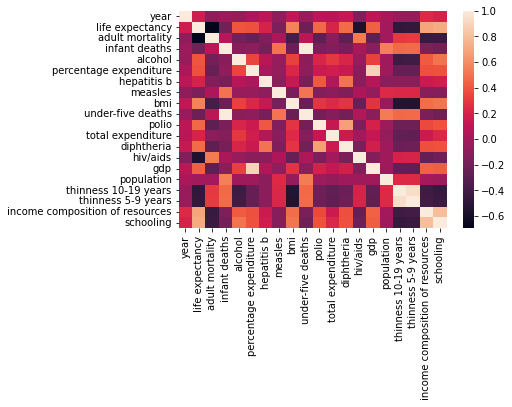

In [77]:
sns.heatmap(df1.corr())

### 높은 양의 상관계수 가지는 컬럼 추려보자

Top 5 Pairs with High Positive Correlation:
infant deaths         under-five deaths         0.996629
under-five deaths     infant deaths             0.996629
thinness 5-9 years    thinness 10-19 years      0.939102
thinness 10-19 years  thinness 5-9 years        0.939102
gdp                   percentage expenditure    0.888140
dtype: float64




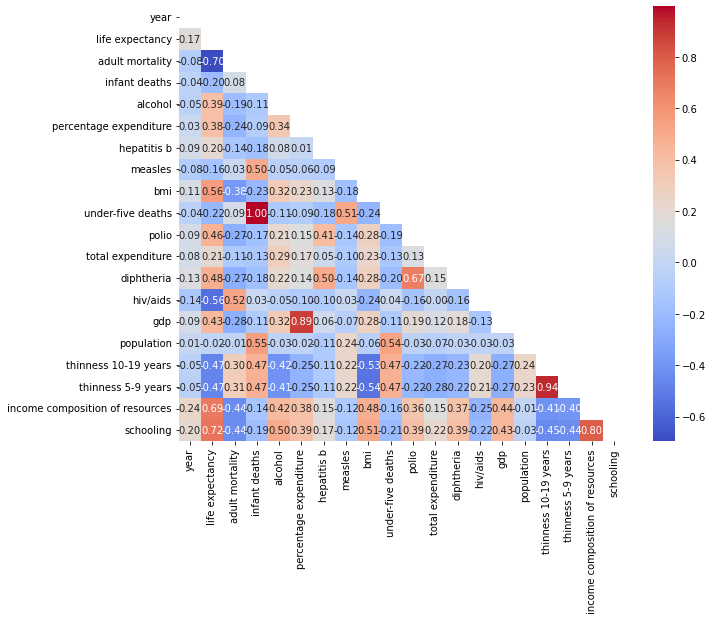

In [78]:
corr_matrix = df1.corr()

# 대각선과 그 이하의 삼각형 부분을 마스킹
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# 양의 상관계수가 높은 5개 쌍
top_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_positive_corr_pairs = top_corr_pairs[(top_corr_pairs > 0) & (top_corr_pairs < 1)].head(5)

print("Top 5 Pairs with High Positive Correlation:")
print(top_positive_corr_pairs)
print('\n')
plt.show()

추가
- under-five deaths와 infant deaths = 1
- gdp와 percentage expenditure = 0.89
- thinness 5-9 years와 thinness 10-19 years = 0.94
- schooling과 income composition of resources = 0.8
- schooling과 life expectancy = 0.72
- income composition of resources와 life expectancy = 0.69
- adult mortality와 life expectancy = -0.7
- bmi와 life expectancy = 0.56

> Top 5 Pairs with High Positive Correlation:
   > - infant deaths         under-five deaths         0.996629
   > - under-five deaths     infant deaths             0.996629
   > - thinness 5-9 years    thinness 10-19 years      0.939102
   > - thinness 10-19 years  thinness 5-9 years        0.939102
   > - gdp                   percentage expenditure    0.888140

<hr>

> 인간의 기대수명 예측이 주 목적이라면, y 컬럼을 life expectancy로 하는 게 적절할까

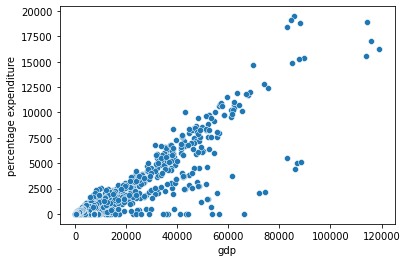

In [79]:
sns.scatterplot(x=df['gdp'],y=df['percentage expenditure']);

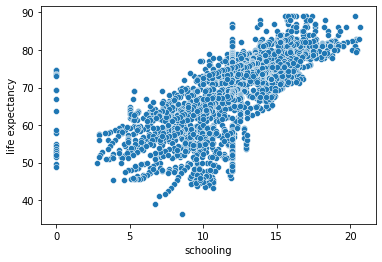

In [80]:
sns.scatterplot(x=df['schooling'],y=df['life expectancy']);

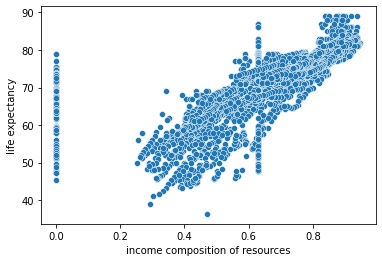

In [81]:
sns.scatterplot(x=df['income composition of resources'],y=df['life expectancy']);

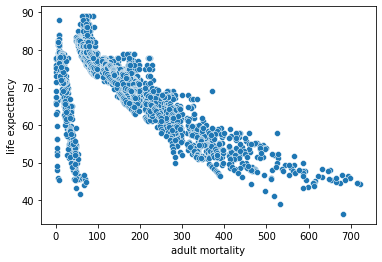

In [82]:
sns.scatterplot(x=df['adult mortality'],y=df['life expectancy']);

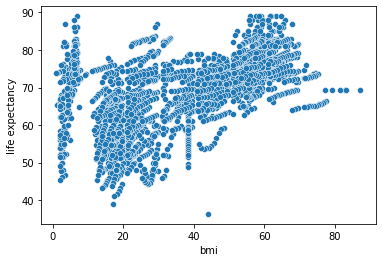

In [83]:
sns.scatterplot(x=df['bmi'],y=df['life expectancy']);

C:\Users\jwoo\AppData\Local\Temp/ipykernel_14632/3590367927.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['life expectancy']);


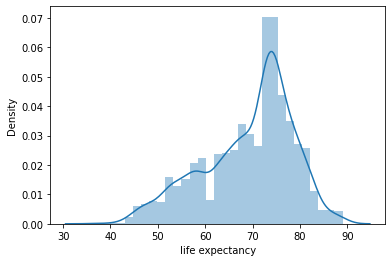

In [84]:
sns.distplot(df['life expectancy']);

C:\Users\jwoo\AppData\Local\Temp/ipykernel_14632/3213830784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['schooling']);


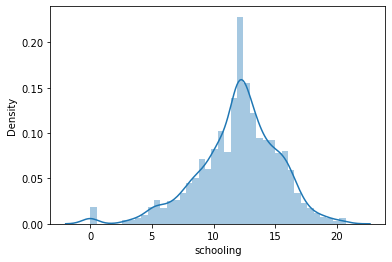

In [85]:
sns.distplot(df['schooling']);

C:\Users\jwoo\AppData\Local\Temp/ipykernel_14632/235688633.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income composition of resources']);


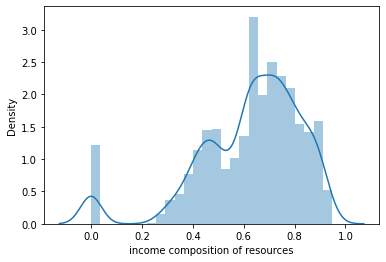

In [86]:
sns.distplot(df['income composition of resources']);

C:\Users\jwoo\AppData\Local\Temp/ipykernel_14632/3386943660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['adult mortality'])


<Axes: xlabel='adult mortality', ylabel='Density'>

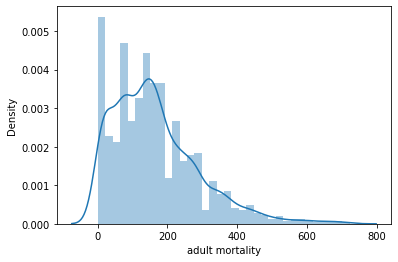

In [87]:
sns.distplot(df['adult mortality'])

C:\Users\jwoo\AppData\Local\Temp/ipykernel_14632/4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

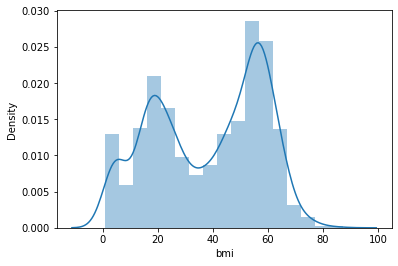

In [88]:
sns.distplot(df['bmi'])

In [89]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
2933       Zimbabwe
2934       Zimbabwe
2935       Zimbabwe
2936       Zimbabwe
2937       Zimbabwe
Name: country, Length: 2938, dtype: object

In [90]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

나라의 수 굉장히 많다, 나라 컬럼을 제거할까.. 흠

In [91]:
df['status'].unique()

array(['Developing', 'Developed'], dtype=object)

## 문자열 인코딩

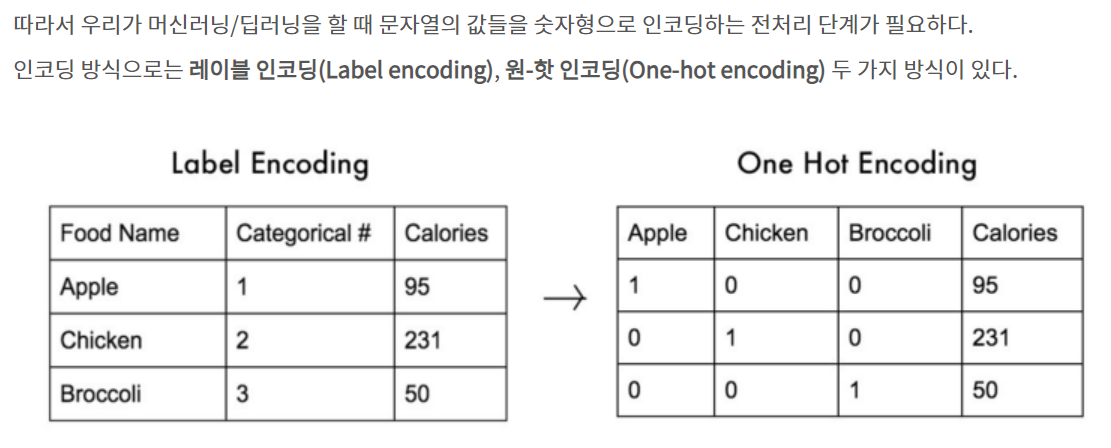

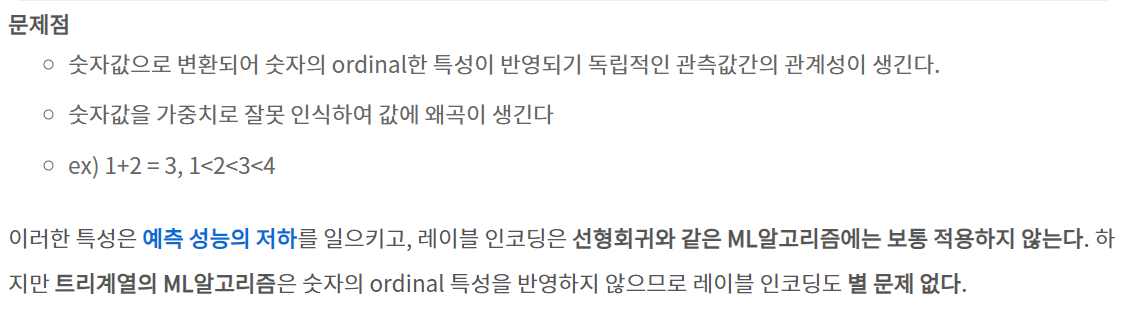

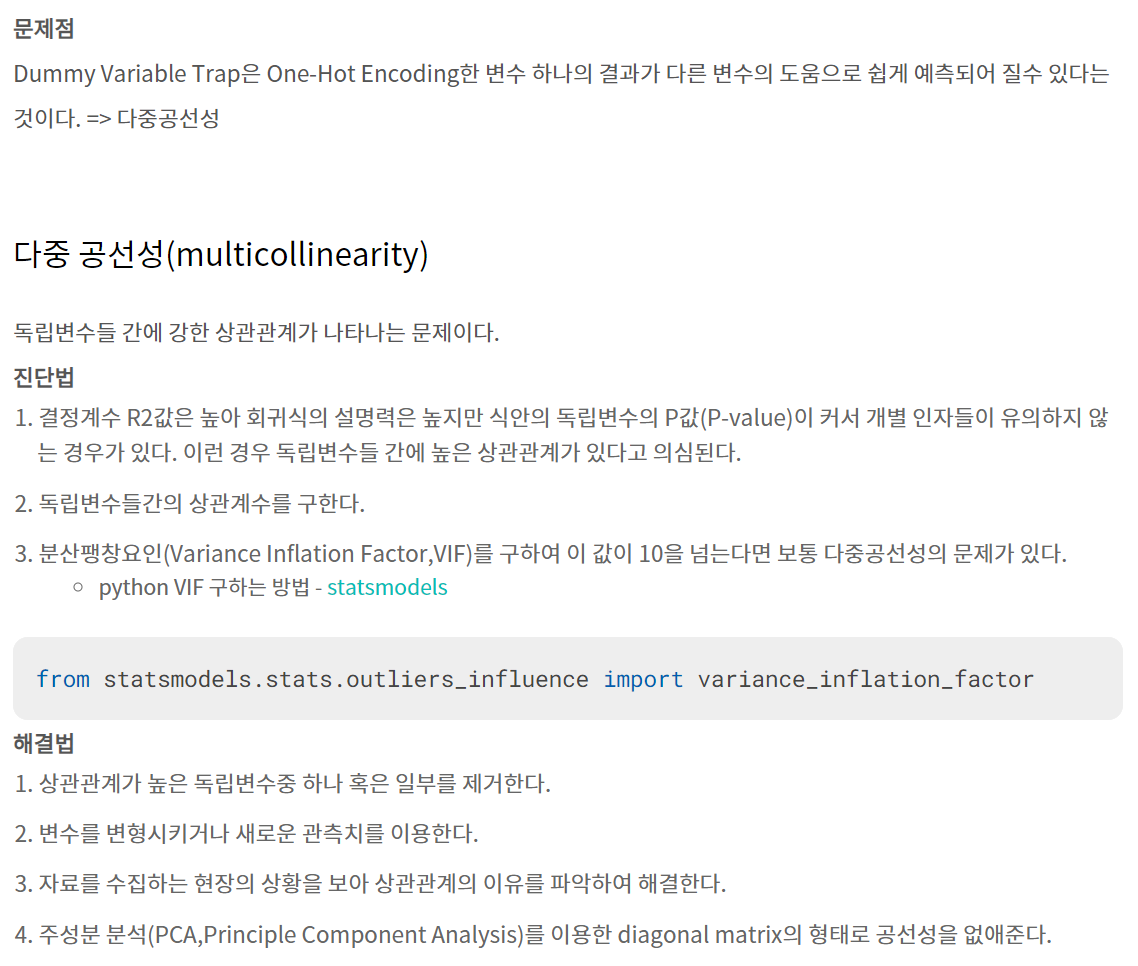

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()
oh_encoder = OneHotEncoder()

# 'status' 컬럼을 Label 인코딩
df['status_encoded'] = label_encoder.fit_transform(df['status'])

# 'status' 컬럼을 One-Hot 인코딩하고 데이터프레임에 추가: 문자열에서 바로 변환되지 않기에, 라벨인코더 적용 후
status_encoded = oh_encoder.fit_transform(df[['status']]).toarray()
status_encoded_df = pd.DataFrame(status_encoded, columns=[f'status_{int(i)}' for i in range(status_encoded.shape[1])])
df = pd.concat([df, status_encoded_df], axis=1)

# 'country' 컬럼을 Label 인코딩
df['country_encoded'] = label_encoder.fit_transform(df['country'])

# 결과 확인
print(df[['status', 'status_encoded', 'country', 'country_encoded']])

          status  status_encoded      country  country_encoded
0     Developing               1  Afghanistan                0
1     Developing               1  Afghanistan                0
2     Developing               1  Afghanistan                0
3     Developing               1  Afghanistan                0
4     Developing               1  Afghanistan                0
...          ...             ...          ...              ...
2933  Developing               1     Zimbabwe              192
2934  Developing               1     Zimbabwe              192
2935  Developing               1     Zimbabwe              192
2936  Developing               1     Zimbabwe              192
2937  Developing               1     Zimbabwe              192

[2938 rows x 4 columns]


'status' 컬럼을 One-Hot 인코딩,'country' 컬럼을 Label 인코딩 

In [96]:
df.head(3)

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,thinness 10-19 years,thinness 5-9 years,income composition of resources,schooling,status_0,status_1,country_encoded,status_encoded,status_0,status_1
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,17.2,17.3,0.479,10.1,0.0,1.0,0,1,0.0,1.0
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,17.5,17.5,0.476,10.0,0.0,1.0,0,1,0.0,1.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,17.7,17.7,0.470,9.9,0.0,1.0,0,1,0.0,1.0


In [97]:
df = df.drop(columns={'country','status'})

In [98]:
df.corr()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,...,thinness 10-19 years,thinness 5-9 years,income composition of resources,schooling,status_0,status_1,country_encoded,status_encoded,status_0,status_1
year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,...,-0.047592,-0.050627,0.236333,0.203471,-0.001864,0.001864,0.001342,0.001864,-0.001864,0.001864
life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,...,-0.472162,-0.466629,0.692483,0.715066,0.481962,-0.481962,-0.016745,-0.481962,0.481962,-0.481962
adult mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,...,0.299863,0.305366,-0.440062,-0.435108,-0.315171,0.315171,0.039760,0.315171,-0.315171,0.315171
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,...,0.465590,0.471228,-0.143663,-0.191757,-0.112252,0.112252,-0.030528,0.112252,-0.112252,0.112252
alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,...,-0.416946,-0.405881,0.416099,0.497546,0.579371,-0.579371,-0.060052,-0.579371,0.579371,-0.579371
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,...,-0.251190,-0.252725,0.380374,0.388105,0.454261,-0.454261,-0.032983,-0.454261,0.454261,-0.454261
hepatitis b,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,...,-0.105144,-0.108334,0.150992,0.171755,0.095642,-0.095642,-0.018918,-0.095642,0.095642,-0.095642
measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,...,0.224742,0.221007,-0.115764,-0.122609,-0.076955,0.076955,-0.024593,0.076955,-0.076955,0.076955
bmi,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,...,-0.532025,-0.538911,0.479837,0.508105,0.310873,-0.310873,0.017724,-0.310873,0.310873,-0.310873
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,...,0.467626,0.472099,-0.161533,-0.207111,-0.115195,0.115195,-0.026509,0.115195,-0.115195,0.115195


<Axes: >

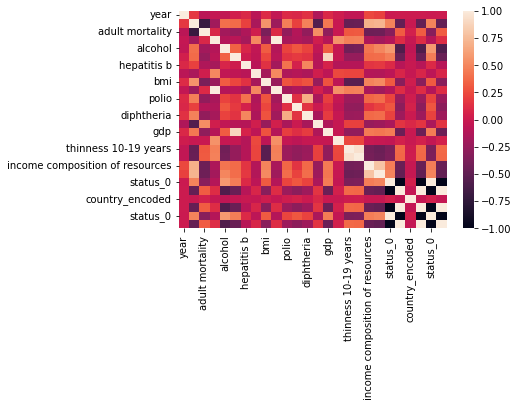

In [99]:
sns.heatmap(df.corr())

Top 5 Pairs with High Positive Correlation:
infant deaths           under-five deaths       0.996629
under-five deaths       infant deaths           0.996629
thinness 5-9 years      thinness 10-19 years    0.939102
thinness 10-19 years    thinness 5-9 years      0.939102
percentage expenditure  gdp                     0.888140
dtype: float64




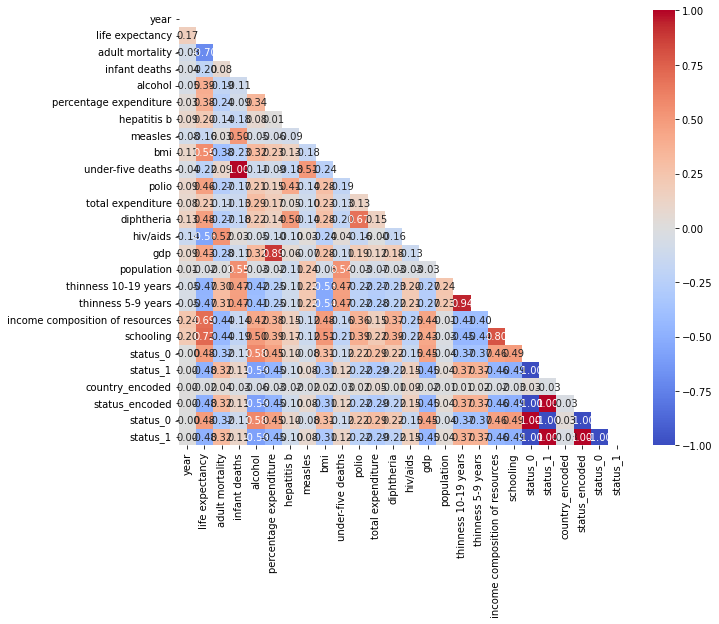

In [100]:
corr_matrix = df.corr()

# 대각선과 그 이하의 삼각형 부분을 마스킹
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")

# 양의 상관계수가 높은 5개 쌍
top_corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
top_positive_corr_pairs = top_corr_pairs[(top_corr_pairs > 0) & (top_corr_pairs < 1)].head(5)

print("Top 5 Pairs with High Positive Correlation:")
print(top_positive_corr_pairs)
print('\n')
plt.show()

In [101]:
# 'life expectancy'와의 상관계수 확인
life_expectancy_corr = corr_matrix['life expectancy']

# 절댓값을 취해 양의 상관계수가 높은 5개 쌍을 찾음
top_corr_with_life_expectancy = life_expectancy_corr.abs().sort_values(ascending=False).head(6)

# 자기 자신인 'life expectancy'는 제외
top_corr_with_life_expectancy = top_corr_with_life_expectancy[1:]

print("Top 5 Features with High Positive Correlation with Life Expectancy:")
print(top_corr_with_life_expectancy)

Top 5 Features with High Positive Correlation with Life Expectancy:
schooling                          0.715066
adult mortality                    0.696359
income composition of resources    0.692483
bmi                                0.559255
hiv/aids                           0.556457
Name: life expectancy, dtype: float64


<Axes: xlabel='status_encoded', ylabel='count'>

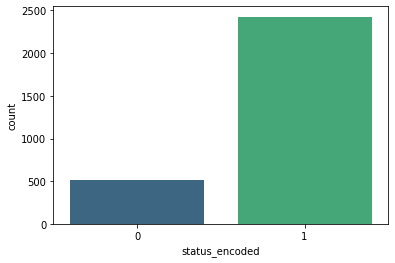

In [102]:
sns.countplot(x = 'status_encoded', data= df, palette = 'viridis')

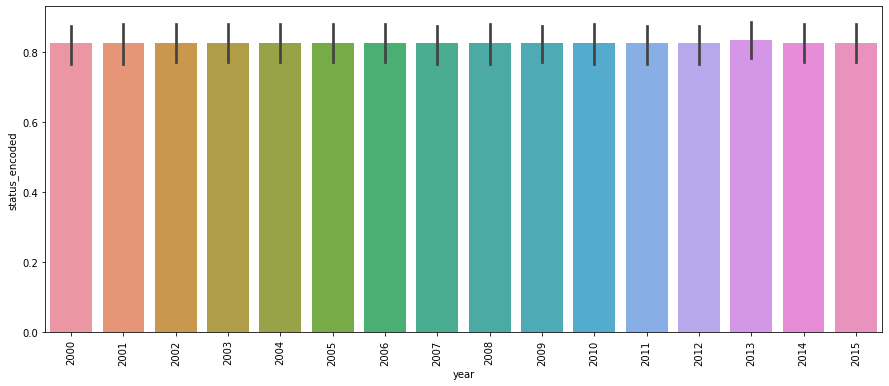

In [103]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df['year'], y=df['status_encoded'])
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
plt.show()

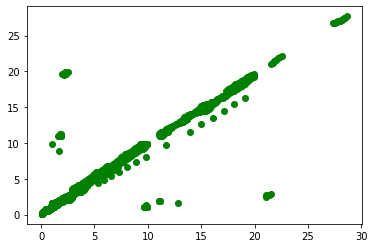

In [104]:
plt.scatter(x=df['thinness 5-9 years'], y=df['thinness 10-19 years'], color='green')

In [105]:
df.columns

Index(['year', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness 10-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling',
       'status_0', 'status_1', 'country_encoded', 'status_encoded', 'status_0',
       'status_1'],
      dtype='object')

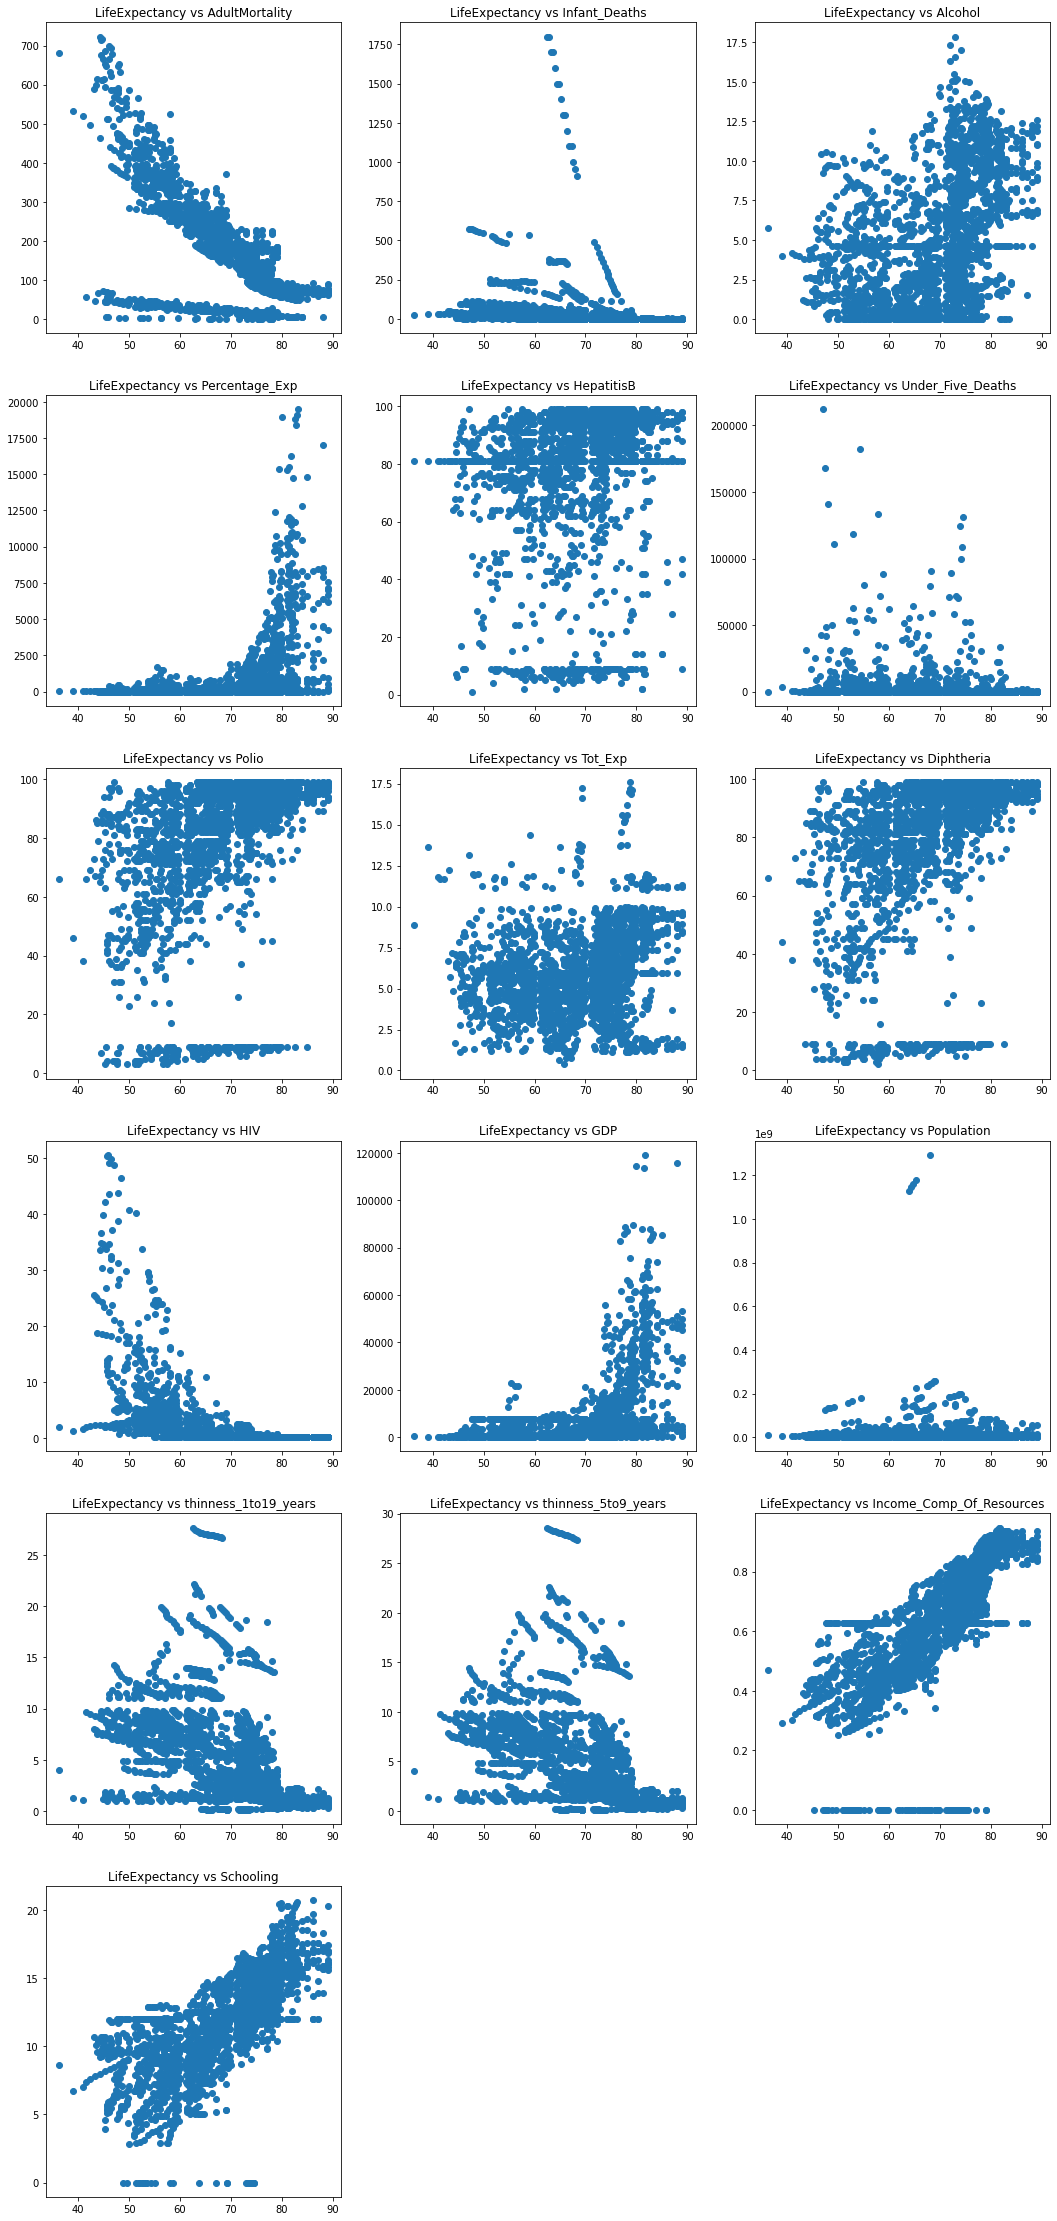

In [106]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(df["life expectancy"], df["adult mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(df["life expectancy"], df["infant deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(df["life expectancy"], df["alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(df["life expectancy"], df["percentage expenditure"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(df["life expectancy"], df["hepatitis b"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(df["life expectancy"], df["measles"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(df["life expectancy"], df["polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(df["life expectancy"], df["total expenditure"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(df["life expectancy"], df["diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(df["life expectancy"], df["hiv/aids"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(df["life expectancy"], df["gdp"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(df["life expectancy"], df["population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(df["life expectancy"], df["thinness 10-19 years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(df["life expectancy"], df["thinness 5-9 years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(df["life expectancy"], df["income composition of resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(df["life expectancy"], df["schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

- Negative relationship with AdultMortality
- Positive relationship with Income_Comp_Of_Resources and Schooling

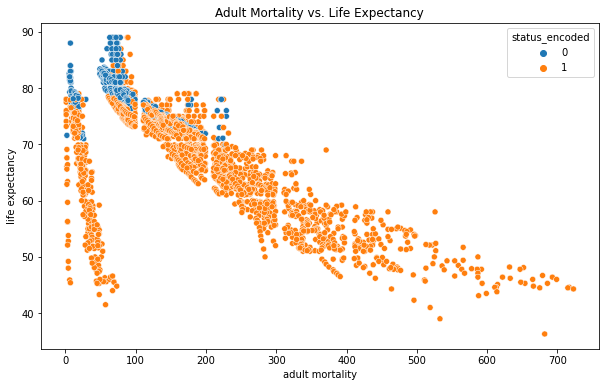

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['adult mortality'], y=df['life expectancy'], data = df, hue=df['status_encoded'])
plt.title('Adult Mortality vs. Life Expectancy')
plt.show()

In [108]:
df.columns

Index(['year', 'life expectancy', 'adult mortality', 'infant deaths',
       'alcohol', 'percentage expenditure', 'hepatitis b', 'measles', 'bmi',
       'under-five deaths', 'polio', 'total expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness 10-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling',
       'status_0', 'status_1', 'country_encoded', 'status_encoded', 'status_0',
       'status_1'],
      dtype='object')

<Axes: xlabel='life expectancy'>

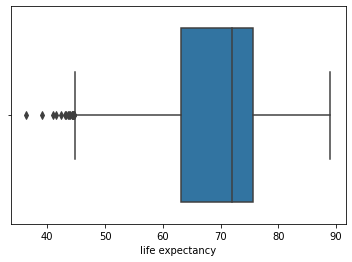

In [109]:
sns.boxplot(x='life expectancy', data = df)

<Axes: xlabel='adult mortality'>

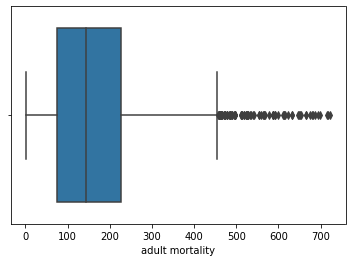

In [110]:
sns.boxplot(x='adult mortality', data = df)

<Axes: xlabel='infant deaths'>

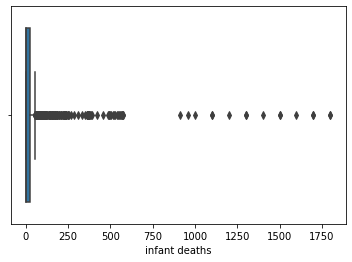

In [111]:
sns.boxplot(x='infant deaths', data = df)

outlier 많아보임

<Axes: xlabel='alcohol'>

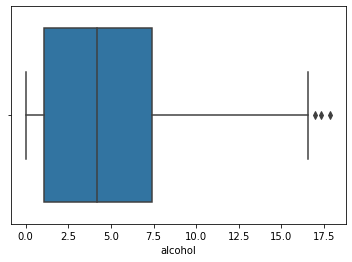

In [112]:
sns.boxplot(x='alcohol', data = df)

<Axes: xlabel='percentage expenditure'>

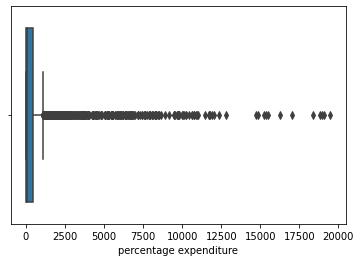

In [113]:
sns.boxplot(x='percentage expenditure', data = df)

outlier 많아보임

<Axes: xlabel='income composition of resources'>

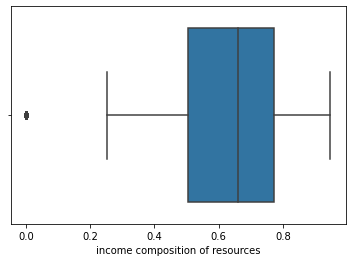

In [114]:
sns.boxplot(x='income composition of resources', data = df)

<Axes: xlabel='schooling'>

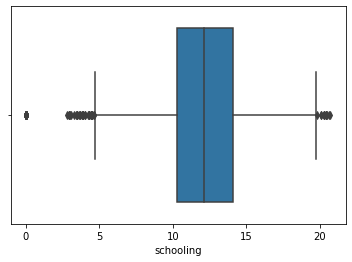

In [115]:
sns.boxplot(x='schooling', data = df)

<Axes: xlabel='polio'>

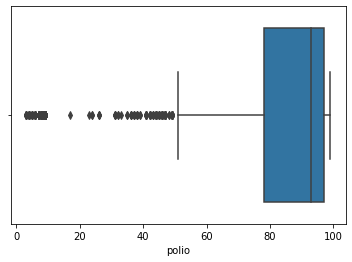

In [116]:
sns.boxplot(x='polio', data = df)

<Axes: xlabel='diphtheria'>

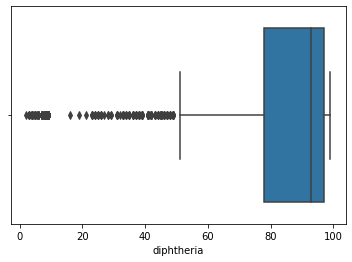

In [117]:
sns.boxplot(x='diphtheria', data = df)

outlier 제거 위해 df 컬럼에 조건 걸어서 수정 혹은 이대로 진행?
ex) df = df[(df['diphtheria'] >= 50) & (df['polio'] >= 50)] 50 이상인 거만 추출, df의 ~% 사용